In [1]:
# local imports
from experiments import run_experiment, multi_trail_experiment
from utils import running_mean

# global imports
import matplotlib.pyplot as plt
import numpy as np
import gym
#import gym_toytext

In [2]:
# TODO: epsilon decay

In [3]:
default_config = {"num_episodes": 1000,
                  "num_trails": 5,
                  "q_discount_factor": 1.0,
                  "q_alpha": 0.1,
                  "q_epsilon": 0.1,
                  "dq_discount_factor": 1.0,
                  "dq_alpha": 0.1,
                  "dq_epsilon": 0.1,}

100%|█████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 42842.74it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 42845.66it/s]


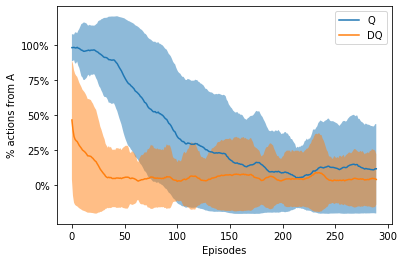

In [4]:
from BiasMDP import BiasMDP

env_name = 'BiasMDP'
environment  = BiasMDP()

config = default_config.copy()
config["num_episodes"] = 300
config["num_trails"] = 50

config["q_epsilon"] = 0.05
config["dq_epsilon"] = 0.05

results = multi_trail_experiment(env_name, environment, config)

for j in list(results.keys()):
    mean = running_mean(results[j]['episode_length'][0], 10)
    std = running_mean(results[j]['episode_length'][1], 10)
    plt.plot(mean, label=f"{j}")
    plt.fill_between(range(len(mean)), mean - std, mean + std, alpha=0.5)
plt.legend()
plt.ylabel("% actions from A")
plt.xlabel("Episodes")
plt.yticks([1,1.25,1.5,1.75,2], ["0%", "25%", "50%", "75%", "100%"])
plt.show()

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 323.15it/s]


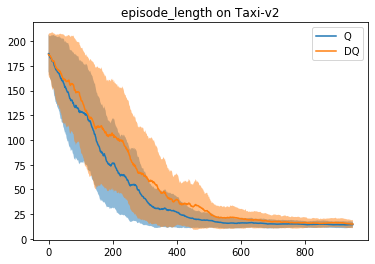

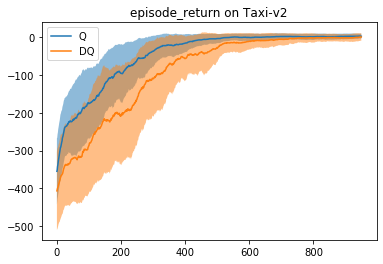

In [17]:
env_name = 'Taxi-v2'
environment  = gym.make(env_name)

config = default_config.copy()
config["num_episodes"] = 1000
config["num_trails"] = 10

config["q_alpha"] = 0.2
config["dq_alpha"] = 0.4

results = multi_trail_experiment(env_name, environment, config)
    
keys = list(results.keys())
for i in results[keys[0]].keys():
    for j in keys:
        if i == "q_values":
            pass
        else:
            mean = running_mean(results[j][i][0],50)
            std = running_mean(results[j][i][1],50)
            plt.plot(mean, label=f"{j}")
            plt.fill_between(range(len(mean)), mean-std, mean+std, alpha=0.5)
    if i == "q_values":
        pass
    else:
        plt.legend()
        plt.title(f'{i} on {env_name}')
        plt.show()

100%|██████████████████████████████████████████████████████████████████████████| 25000/25000 [00:12<00:00, 1950.20it/s]


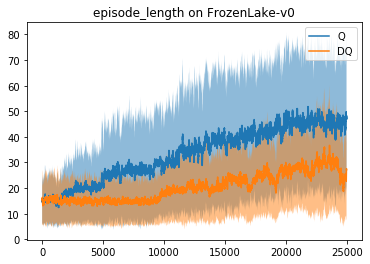

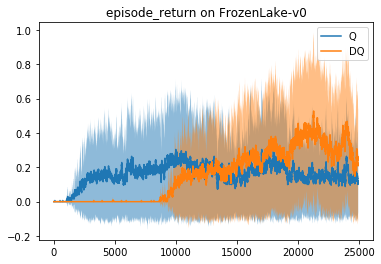

In [18]:
env_name = 'FrozenLake-v0'
environment  = gym.make(env_name)

config = default_config.copy()
config["num_episodes"] = 25000
config["num_trails"] = 5

#config["q_alpha"] = 0.2
#config["dq_alpha"] = 0.4

results = multi_trail_experiment(env_name, environment, config)
    
keys = list(results.keys())
for i in results[keys[0]].keys():
    for j in keys:
        if i == "q_values":
            pass
        else:
            mean = running_mean(results[j][i][0],50)
            std = running_mean(results[j][i][1],50)
            plt.plot(mean, label=f"{j}")
            plt.fill_between(range(len(mean)), mean-std, mean+std, alpha=0.5)
    if i == "q_values":
        pass
    else:
        plt.legend()
        plt.title(f'{i} on {env_name}')
        plt.show()

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:09<00:00, 1110.97it/s]


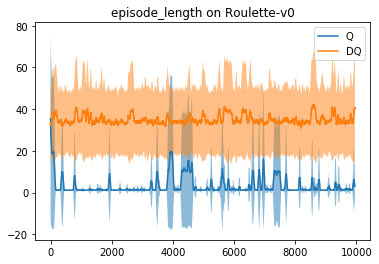

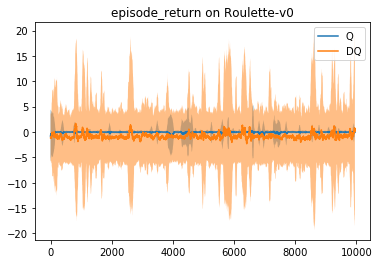

In [19]:
env_name = 'Roulette-v0'
environment  = gym.make(env_name)

config = default_config.copy()
config["num_episodes"] = 10000
config["num_trails"] = 10

results = multi_trail_experiment(env_name, environment, config)
    
keys = list(results.keys())
for i in results[keys[0]].keys():
    for j in keys:
        if i == "q_values":
            pass
        else:
            mean = running_mean(results[j][i][0],50)
            std = running_mean(results[j][i][1],50)
            plt.plot(mean, label=f"{j}")
            plt.fill_between(range(len(mean)), mean-std, mean+std, alpha=0.5)
    if i == "q_values":
        pass
    else:
        plt.legend()
        plt.title(f'{i} on {env_name}')
        plt.show()

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 10212.77it/s]


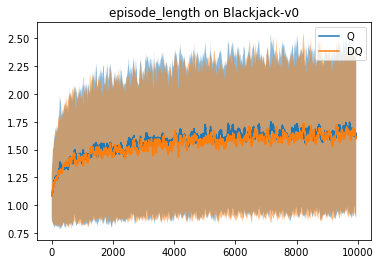

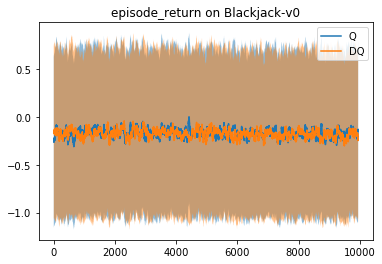

In [22]:
env_name = 'Blackjack-v0'
environment  = gym.make(env_name)

config = default_config.copy()
config["num_episodes"] = 10000
config["num_trails"] = 10

results = multi_trail_experiment(env_name, environment, config)
    
keys = list(results.keys())
for i in results[keys[0]].keys():
    for j in keys:
        if i == "q_values":
            pass
        else:
            mean = running_mean(results[j][i][0],50)
            std = running_mean(results[j][i][1],50)
            plt.plot(mean, label=f"{j}")
            plt.fill_between(range(len(mean)), mean-std, mean+std, alpha=0.5)
    if i == "q_values":
        pass
    else:
        plt.legend()
        plt.title(f'{i} on {env_name}')
        plt.show()